In [1]:
%matplotlib inline
# Switch to ''%matplotlib ipympl' for interactive plots
import warnings
import imp
import pickle
import lmfit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

# Styling
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
# Initialise wrapper and test datasets
wrapper_fpath = (r"..\mobius.py")
wr = imp.load_source('mobius', wrapper_fpath)
wr.initialize('..\..\Applications\SimplyC\simplyc_regional.dll')

# Calibration functions
calib_fpath = (r"..\mobius_calib_uncert_lmfit.py")
cu = imp.load_source('mobius_calib_uncert_lmfit', calib_fpath)

In [3]:
location = 'Langtjern'   #Choose from Storgama, Langtjern, Birkenes

# Load dataset
dataset = wr.DataSet.setup_from_parameter_and_input_files('../../Applications/SimplyC/%s/params_%s_regional.dat' % (location, location), 
                                                          '../../Applications/SimplyC/%s/inputs_%s.dat' % (location, location))

In [4]:
# List of simulated and observed variables to investigate for Morsa
comparisons = [
                ('Reach flow (daily mean, cumecs)', [location], 'Observed flow', [], False),
                ('Reach DOC concentration (volume weighted daily mean)', [location], 'Observed DOC', [], False),
                #('DOC flux from reach, daily mean', [location], 'DOC flux', [], True)
               ]

In [5]:
# Get parameter values defined in 'dataset'
param_df = cu.get_double_parameters_as_dataframe(dataset)
param_df

,name,unit,index,min_value,initial_value,max_value
0,Latitude,°,(),-9.000000e+01,60.600000,9.000000e+01
1,Elevation,m,(),0.000000e+00,0.000000,8.848000e+03
2,PET multiplication factor,dimensionless,(),1.000000e+00,0.480000,2.000000e+00
3,Net emissivity at 0 vapor pressure,dimensionless,(),0.000000e+00,0.340000,1.000000e+00
4,Change in emissivity caused by vapor pressure,kPa^{-1/2},(),0.000000e+00,0.139000,5.000000e-01
5,Initial snow depth as water equivalent,mm,(),0.000000e+00,250.000000,5.000000e+04
6,Degree-day factor for snowmelt,mm/°C/day,(),0.000000e+00,2.000000,5.000000e+00
7,Snow melt offset temperature,°C,(),-4.000000e+00,0.000000,4.000000e+00
8,Snow fall multiplier,dimensionless,(),5.000000e-01,1.000000,1.500000e+00
9,Proportion of precipitation that contributes t...,dimensionless,(),0.000000e+00,0.000000,1.000000e+00



Goodness of fit for Reach flow (daily mean, cumecs) [Langtjern] vs Observed flow []:
Mean error (bias): 0.000607
Mean absolute error: 0.011521
Root mean square error: 0.022965
Nash-Sutcliffe coefficient: 0.417126
Number of observations: 9497


Goodness of fit for Reach DOC concentration (volume weighted daily mean) [Langtjern] vs Observed DOC []:
Mean error (bias): -0.076085
Mean absolute error: 1.495659
Root mean square error: 2.009573
Nash-Sutcliffe coefficient: 0.605781
Number of observations: 1017



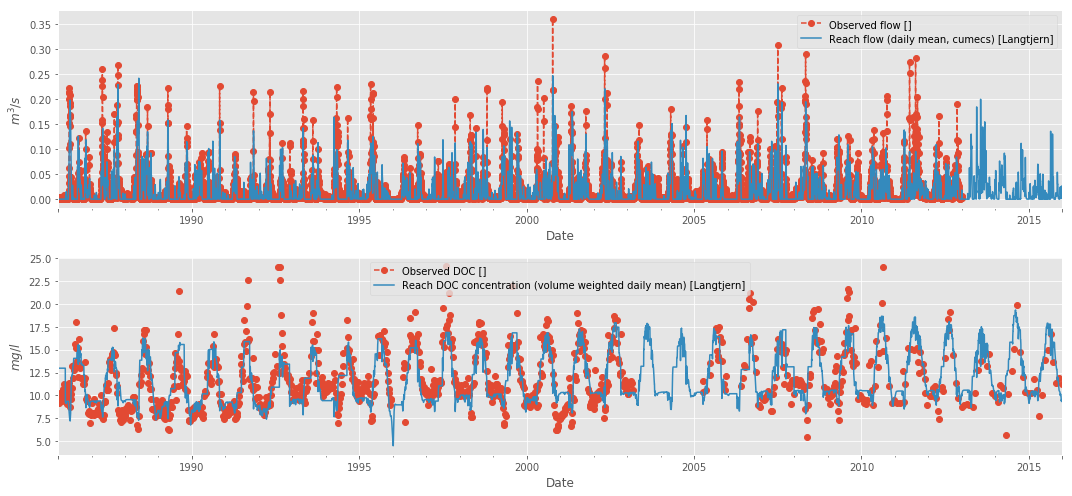

In [6]:
# Plot results from manual calibration
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons, skip_timesteps=365)
cu.plot_objective(dataset, comparisons)

In [7]:
# Get params to be calibrated
vars = [
    2, 6,                #hydrology-related
    9, 16,               #hydrology-related
    #21, 22,              #lake-related (Storgama only)
    26, 27, 28, 29       #carbon-related
]

calib_df = param_df.loc[vars].reset_index(drop=True)
calib_df

,name,unit,index,min_value,initial_value,max_value
0,PET multiplication factor,dimensionless,(),1.000000e+00,0.48,2.000000e+00
1,Degree-day factor for snowmelt,mm/°C/day,(),0.000000e+00,2.00,5.000000e+00
2,Proportion of precipitation that contributes t...,dimensionless,(),0.000000e+00,0.00,1.000000e+00
3,Soil water time constant,days,"(Forest and bog,)",1.000000e-02,3.20,4.000000e+01
4,Soil temperature DOC creation linear coefficient,1/°C,(),-1.797693e+308,0.05,1.797693e+308
5,Soil carbon solubility response to SO4 deposition,1/(mg/l),(),0.000000e+00,0.05,2.000000e+01
6,Baseline Soil DOC dissolution rate,mg/l/day,"(Forest and bog,)",0.000000e+00,3.00,1.000000e+02
7,Baseline Soil DOC concentration,mg/l,"(Forest and bog,)",0.000000e+00,11.00,1.000000e+02


In [8]:
# Add 'short_name' column for calibrating parameters
calib_df['short_name'] = [
    'alphaPET', 'DDFmelt',
    'fquick', 'Ts',
    #'r_exp', 'r_lin',
    'kT', 'kSO4', 'C_diss', 'DOCb'
]

In [9]:
# Convert to LMFit parameter object
params = cu.parameter_df_to_lmfit(calib_df)


params['kT'].min = 0.0
params['kT'].max = 0.2

params['kSO4'].min = 0.0
params['kSO4'].max = 0.2

params['C_diss'].max = 3.0

params['DOCb'].min = 1.0
params['DOCb'].max = 14.0


params['fquick'].min = 0.0
params['fquick'].max = 0.1

params['Ts'].max = 5.0

#params['alphaPET'].max = 3.0

params

         Consider setting (min < value < max) instead?


name,value,initial value,min,max,vary
alphaPET,1.00000000,0.4800000000000001,1.00000000,2.00000000,True
DDFmelt,2.00000000,2.0,0.00000000,5.00000000,True
fquick,0.00000000,0.0,0.00000000,0.10000000,True
Ts,3.20000000,3.2,0.01000000,5.00000000,True
kT,0.05000000,0.05,0.00000000,0.20000000,True
kSO4,0.05000000,0.05,0.00000000,0.20000000,True
C_diss,3.00000000,3.0,0.00000000,3.00000000,True
DOCb,11.0000000,11.0,1.00000000,14.0000000,True


In [10]:
def normal_weight(series) :
    size = np.count_nonzero(~np.isnan(series))
    return series / np.sqrt(size)

# Custom residual function that takes into account yearly sums as well as daily values
def resid(params, dataset, comparisons, norm=False, skip_timesteps=0) :
    dataset_copy = dataset.copy()
    cu.set_parameter_values(params, dataset_copy)
    dataset_copy.run_model()
    
    residuals = []
    
    for i, comparison in enumerate(comparisons):
        simname, simindexes, obsname, obsindexes, weighsums = comparison
    
        sim = dataset_copy.get_result_series(simname, simindexes)[skip_timesteps:]
        obs = dataset_copy.get_input_series(obsname, obsindexes, alignwithresults=True)[skip_timesteps:]
        
        if np.isnan(sim).any() :
            raise ValueError('Got a NaN in the simulated data')

        resid = sim - obs
        
        residuals.append(normal_weight(resid))
        
        if weighsums :
            date_index = cu.get_date_index(dataset)[skip_timesteps:]
            yearly_resid = pd.Series(data=resid, index=date_index, copy=False)
            yearly_resid = yearly_resid.resample('Y').sum()
            residuals.append(normal_weight(yearly_resid.values))

    dataset_copy.delete()   
    
    return np.concatenate(residuals)

In [11]:
%%time

mi, res = cu.minimize_residuals(params, dataset, comparisons, residual_method=resid, method='leastsq', norm=False, 
                                skip_timesteps=365)

print('Optimisation results:\n')
lmfit.report_fit(res)
print('\n\nOptimised parameter values:\n')
res.params.pretty_print(precision=3)

Optimisation results:

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 134
    # data points      = 10514
    # variables        = 8
    chi-square         = 3.91749585
    reduced chi-square = 3.7288e-04
    Akaike info crit   = -82992.1388
    Bayesian info crit = -82934.0551
##  Warning: uncertainties could not be estimated:
    alphaPET:  at initial value
    alphaPET:  at boundary
    fquick:    at boundary
    C_diss:    at initial value
    C_diss:    at boundary
[[Variables]]
    alphaPET:  1.00000000 (init = 1)
    DDFmelt:   1.64443275 (init = 2)
    fquick:    5.5868e-10 (init = 0)
    Ts:        0.35235712 (init = 3.2)
    kT:        0.06034247 (init = 0.05)
    kSO4:      0.03790367 (init = 0.05)
    C_diss:    2.99999756 (init = 3)
    DOCb:      10.7002734 (init = 11)


Optimised parameter values:

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
C_diss           3        0        3     None     True     None     Non


Goodness of fit for Reach flow (daily mean, cumecs) [Langtjern] vs Observed flow []:
Mean error (bias): -0.005098
Mean absolute error: 0.013557
Root mean square error: 0.026928
Nash-Sutcliffe coefficient: 0.198581
Number of observations: 9497


Goodness of fit for Reach DOC concentration (volume weighted daily mean) [Langtjern] vs Observed DOC []:
Mean error (bias): -0.054715
Mean absolute error: 1.471119
Root mean square error: 1.979083
Nash-Sutcliffe coefficient: 0.617652
Number of observations: 1017



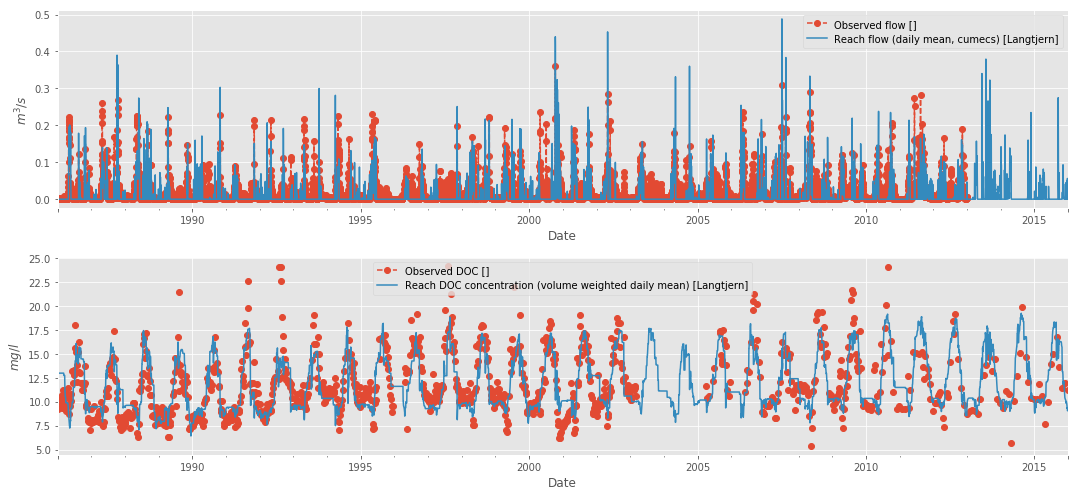

In [12]:
# Plot results from optimisation
cu.set_parameter_values(res.params, dataset)

dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons, skip_timesteps=365)
cu.plot_objective(dataset, comparisons)

In [13]:
dataset.write_parameters_to_file('optimal_params.dat')
res.params.pretty_print(columns=['value', 'min', 'max', 'vary'])

Name         Value      Min      Max     Vary
C_diss       2.998        0        3     True
DDFmelt     0.3798        0        5     True
DOCb          4.67        1       10     True
Ts          0.7854     0.01        5     True
alphaPET     1.021        1        2     True
fquick    1.128e-06        0      0.1     True
kSO4           0.2        0      0.2     True
kT         0.05938        0      0.2     True


In [14]:
res.params.add(lmfit.Parameter('err_doc', value=0.5, min=0.05, max=3, user_data={}))
res.params.pretty_print(columns=['value', 'min', 'max', 'vary'])

Name        Value      Min      Max     Vary
DDFmelt     5.119        0        7     True
DDPET      0.1197     0.05      0.2     True
DOCb         7.28        1       10     True
DOCc        0.902        0        3     True
Tmelt       2.145       -4        4     True
Ts          1.154     0.01       40     True
err_doc       0.5     0.05        3     True
fquick    0.00183        0        1     True
kSO4       0.1425        0        1     True
kT1       0.03517        0      0.1     True
minPET   -0.01005       -5        5     True
msnow       1.498      0.5      1.5     True


In [15]:
error_param_dict = {'Observed DOC':  'err_doc'}

In [34]:
#params['kT1'].min = 0.0
#params['kT1'].max = 1.0
#params['kT2'].min = -0.1
#params['kT2'].max = 0.1

#params['kSO4'].min = 0.0
#params['kSO4'].max = 2.0

#params['DOCsbase'].min = 5.0
#params['DOCsbase'].max = 15.0

In [16]:
# emcee setup
nworkers = 8    # Number of cores/processes for parallelisation
ntemps = 1      # Number of temperatures for parallel tempering (use 1 for default ensemble sampler)
nsteps = 10000   # Number of steps per chain
nwalk = 100     # Number of chains/walkers
nburn = 1000     # Number of steps to discard as burn-in
thin = 1        # Keep only every 'thin' steps to reduce chain auto-correlation

# Chain initialisation
# 'uniform' => Chain starting locations sampled uniformly from prior
# 'optimum' => Chain starting locations sampled from a small Gaussian ball in vicinity of optimum
init_chains = 'optimum' #'uniform'  # Or 'optimum'. 

skip_timesteps = 365  # Number of time steps to skip before calulating fit

# Result file paths
result_path = r'results/mcmc_results.pkl'
chain_plot_path = r'results/chains.png'
corner_plot_path = r'results/corner.png'

In [17]:
settings_dict = {'params':res.params,
                 'error_param_dict':error_param_dict,
                 'comparisons':comparisons,
                 'skip_timesteps':skip_timesteps,
                 'nworkers':nworkers,
                 'ntemps':ntemps,
                 'nsteps':nsteps,
                 'nwalk':nwalk,
                 'nburn':nburn,
                 'thin':thin,
                 'init_chains':init_chains,
                 'result_path':result_path,
                 'chain_path':chain_plot_path,
                 'corner_path':corner_plot_path,                 
                }

with open('results/mcmc_settings.pkl', 'wb') as handle:
    pickle.dump(settings_dict, handle)

Time elapsed running emcee: 745.72 minutes.



Quantiles:
[(0.025, 0.08402287623271039), (0.5, 0.0908916979120632), (0.975, 0.10023234907873975)]
Quantiles:
[(0.025, -4.9941287538933805), (0.5, -4.82281667586652), (0.975, -3.95639941657449)]
Quantiles:
[(0.025, 5.797750868526745), (0.5, 6.777520595988646), (0.975, 6.991687482462222)]


Quantiles:
[(0.025, 3.1633914832486694), (0.5, 3.605140371085988), (0.975, 3.9511647958614438)]
Quantiles:
[(0.025, 1.2007552265299568), (0.5, 1.3913309667270102), (0.975, 1.4944840991368773)]
Quantiles:
[(0.025, 0.00022327050348794472), (0.5, 0.006343918910822173), (0.975, 0.039064550971333295)]


Quantiles:
[(0.025, 1.089679974116299), (0.5, 1.80856961674833), (0.975, 2.604959400017493)]
Quantiles:
[(0.025, 0.032397237599327104), (0.5, 0.04067036731381205), (0.975, 0.052079040860642925)]
Quantiles:
[(0.025, 0.09213321493021798), (0.5, 0.11986820116391601), (0.975, 0.15823530934903224)]
Quantiles:
[(0.025, 0.7538361644587934), (0.5, 0.9523276064526808), (0.975, 1.2273067880905524)]
Quantiles:
[(0.025, 6.284598283274514), (0.5, 6.500184474649916), (0.975, 6.732670083149347)]
Quantiles:
[(0.025, 0.17428045967225786), (0.5, 0.18103461771991397), (0.975, 0.18824531946868886)]


KeyError: 'map'

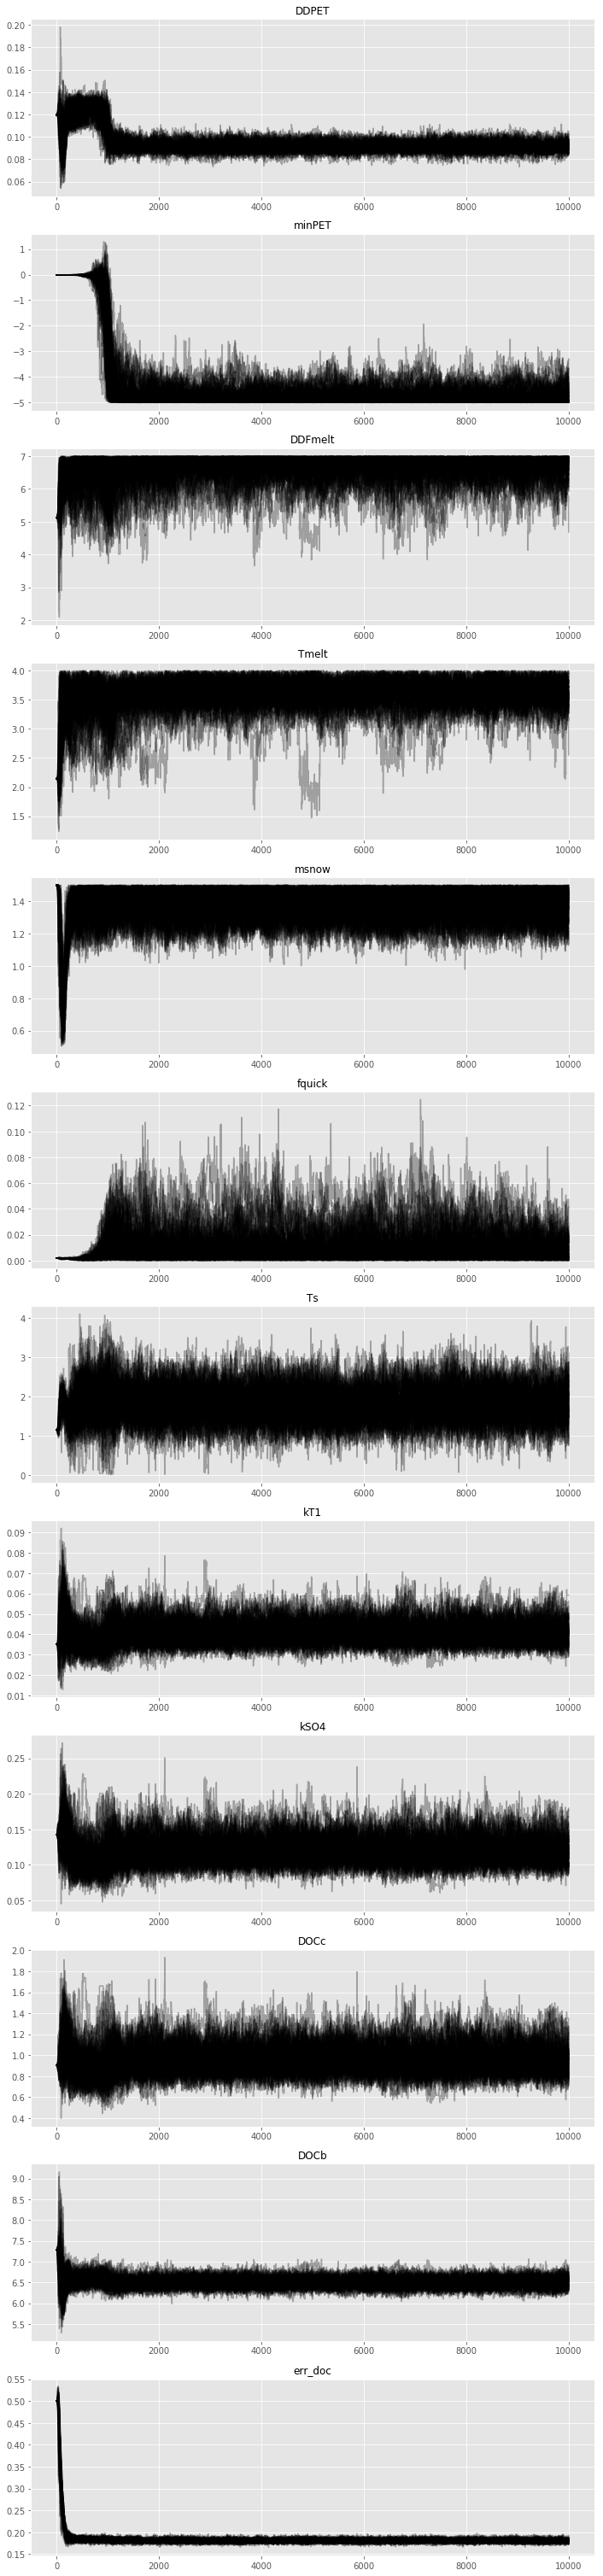

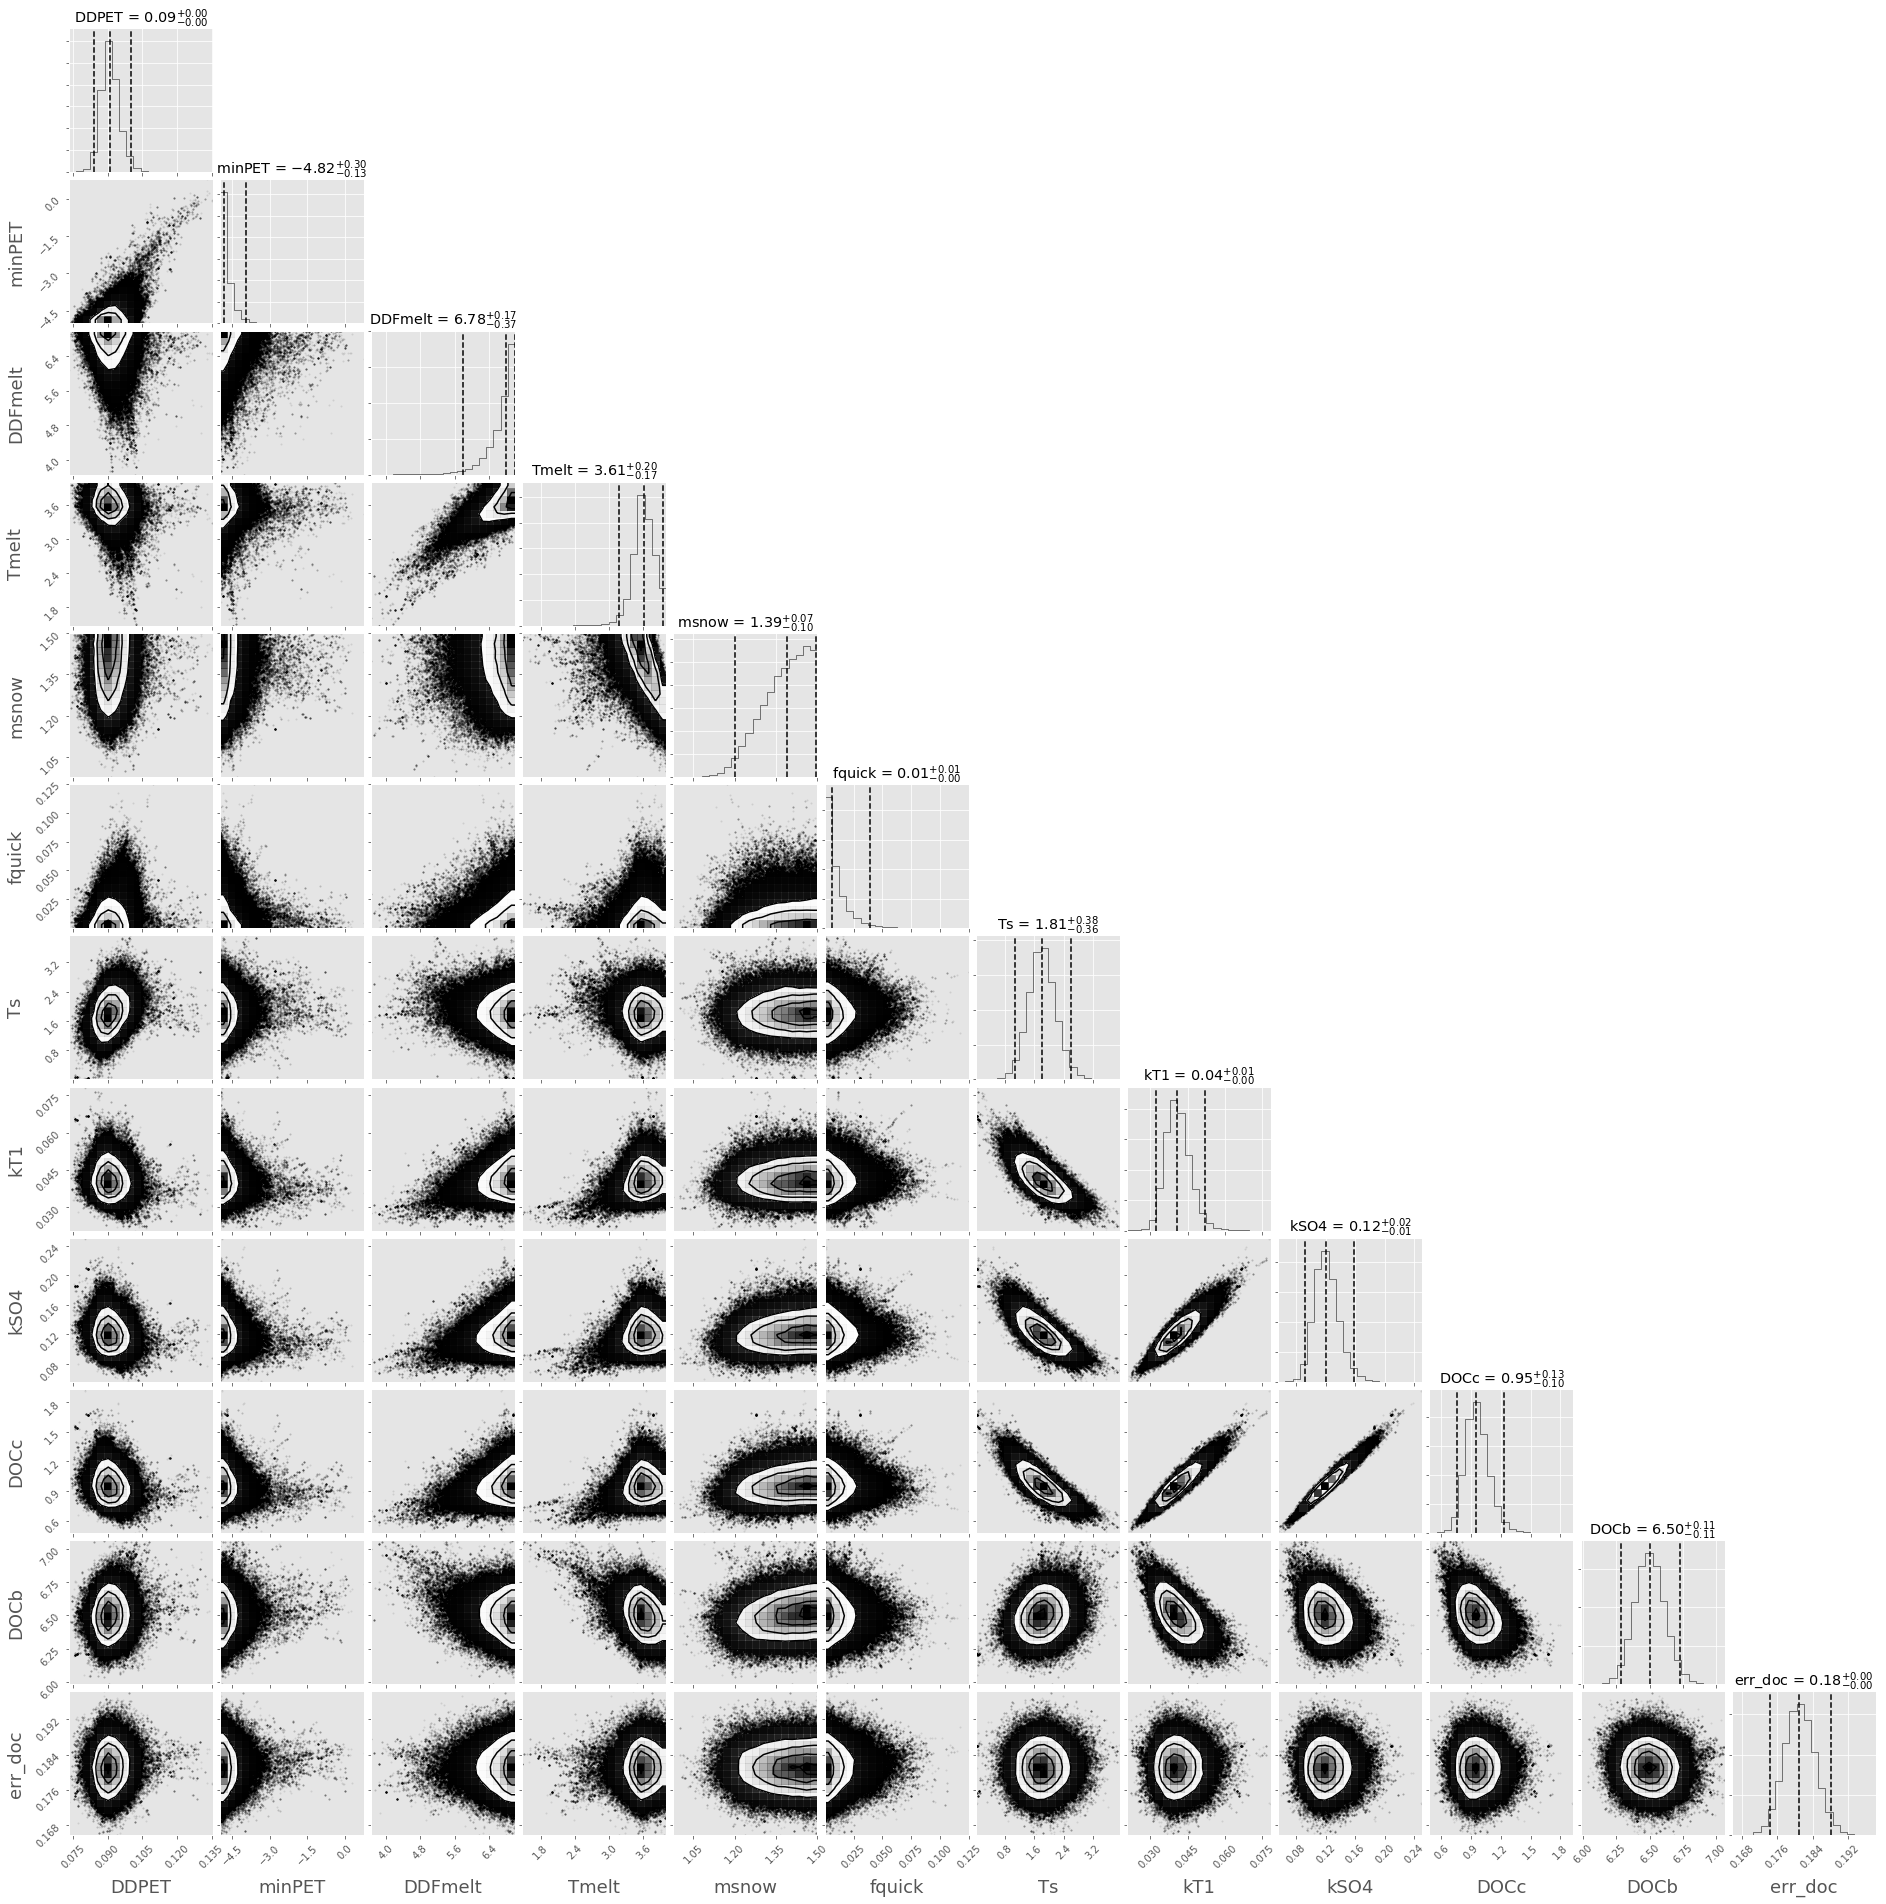

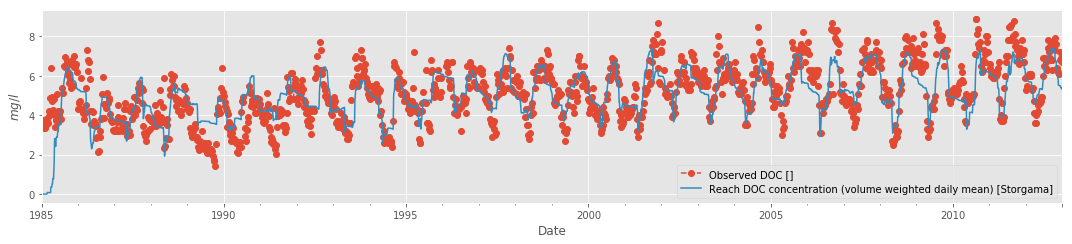

In [18]:
%run -i SimplyC_calib_uncert.py

In [ ]:
with open('results/mcmc_results.pkl', 'rb') as handle:
    result = pickle.load(handle)